In [1]:
import itertools, json, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
from tqdm.auto import tqdm

%cd /data/bruingjde/on-going/SNAM2021-code/

/data/bruingjde/on-going/SNAM2021-code


In [2]:
def get_result():
    networks = [network for network in np.arange(1, 31) if network not in [15, 17, 26, 27]]
    network_information = pd.read_json('networks.jsonl', lines=True).set_index(np.arange(1, 31)).to_dict(orient='index')
    result = []
    iterations = [(network, nswap_perc) for network in networks for nswap_perc in np.arange(-100, 101, 20)]
    for network, nswap_perc in tqdm(iterations):
        stats = {'network': network, 'nswap_perc': nswap_perc, **network_information[network]}
        directory = f'data/{network:02}/{nswap_perc:+04.0f}/properties/'       
        for file in os.scandir(directory):
            with open(file.path) as f:
                content = f.read()
            file_name, file_extension = file.name.split('.')
            if file_extension == 'int':
                content = int(content)
            elif file_extension == 'float':
                content = float(content)
            stats[file_name] = content
        result.append(stats)
    return result
result = get_result()

  0%|          | 0/286 [00:00<?, ?it/s]

# Assortativity

In [3]:
df = (
  pd.DataFrame(result)
  .pivot(['network', 'label', 'nodes'], 'nswap_perc', 'assortativity')
  .sort_values('nodes')
  .reset_index(['nodes', 'network'], drop=True)
  .rename(columns=lambda x: f"{x}%")
  .round(2)
  .dropna(how='all')
)
df.loc['mean'] = df.mean()
df

nswap_perc,-100%,-80%,-60%,-40%,-20%,0%,20%,40%,60%,80%,100%
label,,,,,,,,,,,
Rado,0.010000,0.010000,0.070000,0.09,-0.000000,0.150000,0.140000,0.180000,0.16,0.090000,0.190000
UC,-0.050000,-0.030000,-0.020000,0.01,0.060000,0.100000,0.140000,0.170000,0.18,0.210000,0.230000
EU,0.230000,0.160000,0.360000,0.34,0.150000,0.050000,0.120000,0.110000,0.10,-0.180000,-0.110000
Dem,-0.210000,-0.210000,-0.160000,-0.14,-0.140000,-0.150000,-0.060000,-0.000000,0.06,0.090000,0.130000
bitA,-0.250000,-0.240000,-0.220000,-0.19,-0.170000,-0.150000,-0.100000,-0.040000,0.01,0.100000,0.220000
bitOT,-0.230000,-0.220000,-0.200000,-0.17,-0.160000,-0.150000,-0.110000,-0.070000,-0.02,0.040000,0.140000
chess,-0.170000,-0.140000,-0.050000,0.04,0.180000,0.360000,0.520000,0.620000,0.69,0.740000,0.780000
HepTh,-0.180000,-0.130000,-0.080000,-0.03,0.030000,0.080000,0.180000,0.310000,0.46,0.570000,0.610000
HepPh,-0.110000,-0.070000,-0.020000,0.04,0.100000,0.170000,0.260000,0.350000,0.43,0.480000,0.520000


In [5]:
df = (
  pd.DataFrame(result)
  .pivot(['network', 'label', 'nodes'], 'nswap_perc', 'assortativity')
  .sort_values('nodes')
  .reset_index(['network', 'nodes'], drop=True)
  .rename_axis(index=None, columns=None)
  .rename(columns=lambda x: f"{x}%")
  .dropna(how='all')
)
print(
  df.round(2)
    .to_latex(caption="Assortatvity of all networks after rewiring.", 
              label='tab:rewire-assortativity', 
              index=True, 
              column_format='lr@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r'))

\begin{table}
\centering
\caption{Assortatvity of all networks after rewiring.}
\label{tab:rewire-assortativity}
\begin{tabular}{lr@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r}
\toprule
{} &  -100\% &  -80\% &  -60\% &  -40\% &  -20\% &    0\% &   20\% &   40\% &   60\% &   80\% &  100\% \\
\midrule
Rado  &   0.01 &  0.01 &  0.07 &  0.09 & -0.00 &  0.15 &  0.14 &  0.18 &  0.16 &  0.09 &  0.19 \\
UC    &  -0.05 & -0.03 & -0.02 &  0.01 &  0.06 &  0.10 &  0.14 &  0.17 &  0.18 &  0.21 &  0.23 \\
EU    &   0.23 &  0.16 &  0.36 &  0.34 &  0.15 &  0.05 &  0.12 &  0.11 &  0.10 & -0.18 & -0.11 \\
Dem   &  -0.21 & -0.21 & -0.16 & -0.14 & -0.14 & -0.15 & -0.06 & -0.00 &  0.06 &  0.09 &  0.13 \\
bitA  &  -0.25 & -0.24 & -0.22 & -0.19 & -0.17 & -0.15 & -0.10 & -0.04 &  0.01 &  0.10 &  0.22 \\
bitOT &  -0.23 & -0.22 & -0.20 & -0.17 & -0.16 & -0.15 & -0.11 & -0.07 & -0.02 &  0.04 &  0.1

<AxesSubplot:xlabel='assortativity', ylabel='label'>

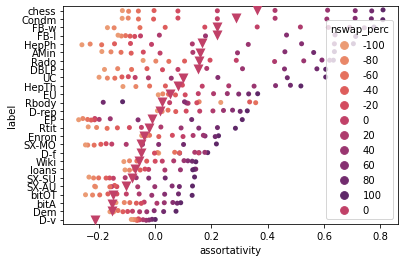

In [11]:
sns.stripplot(
  data=pd.DataFrame(result).dropna(subset=['assortativity']).fillna(0).sort_values(['assortativity'], ascending=[False]),
  x='assortativity', y='label', hue='nswap_perc', palette='flare'
)
sns.stripplot(
  data=pd.DataFrame(result).dropna(subset=['assortativity']).fillna(0).sort_values(['assortativity'], ascending=[False]).query('(nswap_perc == 0)'),
  x='assortativity', y='label', hue='nswap_perc', palette='flare', marker='v', size=10
)

# Triangle

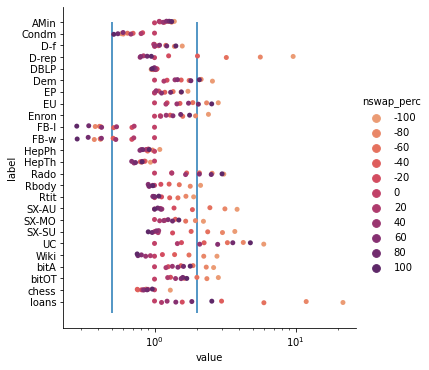

In [17]:
ax = sns.catplot(
  data=(
    pd.DataFrame(result)
    .dropna(subset=['triangles'])
    .pivot(['label'], 'nswap_perc', 'triangles')
    .apply(lambda x: x/x[0], axis=1)
    .dropna()
    .melt(ignore_index=False)
    .reset_index()),
  x='value', y='label', hue='nswap_perc', palette='flare'
)
plt.xscale('log')
plt.vlines([.5, 2], 0, 25)

# Performance

In [18]:
norm = (
  pd.DataFrame(result)
  .query('nswap_perc == 0')
  .dropna(subset=['II-A_LogisticRegression'])
  .set_index('label')
  .sort_values('nodes')
  ['II-A_LogisticRegression']
)

In [20]:
(
  pd.DataFrame(result)
  .dropna(subset=['II-A_LogisticRegression'])
  .pivot(['label', 'nodes'], 'nswap_perc', 'II-A_LogisticRegression')
  .sort_values('nodes')
  .reset_index('nodes', drop=True)
  .sub(norm, axis='index')
  .rename_axis(index=None, columns=None)
  .round(3)
)

,-100,-80,-60,-40,-20,0,20,40,60,80,100
AMin,-0.278,-0.292,-0.292,-0.310,-0.320,0.0,-0.385,-0.337,-0.375,-0.372,-0.095
Condm,-0.243,-0.252,-0.269,-0.294,-0.344,0.0,-0.273,-0.263,-0.252,-0.243,-0.095
D-f,-0.170,-0.202,-0.227,-0.263,-0.292,0.0,-0.325,-0.295,-0.278,-0.213,0.012
D-rep,-0.416,-0.445,-0.506,-0.586,-0.332,0.0,-0.233,-0.202,-0.187,-0.167,-0.006
D-v,0.097,-0.011,-0.019,-0.044,-0.073,0.0,-0.077,-0.047,-0.047,-0.043,0.017
DBLP,-0.335,-0.331,-0.330,-0.358,-0.361,0.0,-0.431,-0.357,-0.443,-0.427,-0.046
Dem,-0.152,-0.162,-0.134,-0.171,-0.105,0.0,-0.130,-0.124,-0.123,-0.169,-0.021
EP,-0.198,-0.215,-0.216,-0.253,-0.246,0.0,-0.300,-0.301,-0.264,-0.205,0.012
EU,-0.061,-0.119,-0.088,-0.084,-0.074,0.0,-0.070,-0.106,-0.067,-0.107,-0.109
Enron,-0.165,-0.171,-0.177,-0.191,-0.188,0.0,-0.211,-0.214,-0.228,-0.200,0.004


In [21]:
df = (
  pd.DataFrame(result)
  .dropna(subset=['II-A_LogisticRegression'])
  .pivot(['label', 'nodes'], 'nswap_perc', 'II-A_LogisticRegression')
  .sort_values('nodes')
  .reset_index('nodes', drop=True)
  .sub(norm, axis='index')
  .rename_axis(index=None, columns=None)
  .rename(columns=lambda x: f"{x}%")
)
df.loc['mean'] = df.mean()
print(
  df.round(3)
  .to_latex(caption="Performance of all networks after rewiring.", 
          label='tab:rewire-performance', 
          index=True, 
          column_format='lr@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r')
)

\begin{table}
\centering
\caption{Performance of all networks after rewiring.}
\label{tab:rewire-performance}
\begin{tabular}{lr@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r@{\hspace{1em}}r}
\toprule
{} &  -100\% &   -80\% &   -60\% &   -40\% &   -20\% &   0\% &    20\% &    40\% &    60\% &    80\% &   100\% \\
\midrule
AMin  & -0.278 & -0.292 & -0.292 & -0.310 & -0.320 &  0.0 & -0.385 & -0.337 & -0.375 & -0.372 & -0.095 \\
Condm & -0.243 & -0.252 & -0.269 & -0.294 & -0.344 &  0.0 & -0.273 & -0.263 & -0.252 & -0.243 & -0.095 \\
D-f   & -0.170 & -0.202 & -0.227 & -0.263 & -0.292 &  0.0 & -0.325 & -0.295 & -0.278 & -0.213 &  0.012 \\
D-rep & -0.416 & -0.445 & -0.506 & -0.586 & -0.332 &  0.0 & -0.233 & -0.202 & -0.187 & -0.167 & -0.006 \\
D-v   &  0.097 & -0.011 & -0.019 & -0.044 & -0.073 &  0.0 & -0.077 & -0.047 & -0.047 & -0.043 &  0.017 \\
DBLP  & -0.335 & -0.331 & -0.330 & -0.358 & -0.3

In [22]:
scipy.stats.kruskal(
  pd.DataFrame(result).loc[lambda x: x['nswap_perc'] == 0, 'II-A_LogisticRegression'].dropna(),
  pd.DataFrame(result).loc[lambda x: x['nswap_perc'] == 0, 'II-A_RandomForest'].dropna())

KruskalResult(statistic=4.507250945775528, pvalue=0.03375144527914058)

# Other classifiers

In [23]:
df = (
  pd.DataFrame(result)
  .query('nswap_perc == 0')
  .set_index('label')
  .sort_values('nodes')
  .rename(columns={'II-A_LogisticRegression': 'Logistic Regression', 'II-A_RandomForest': 'Random Forest', 'II-A_XGBoost': 'XGBoost'})
  [['Logistic Regression', 'Random Forest', 'XGBoost']]
  .dropna()
  .rename_axis(None)
)
df

,Logistic Regression,Random Forest,XGBoost
Rado,0.819987,0.951218,0.954909
UC,0.874328,0.942416,0.945951
EU,0.814727,0.953162,0.942272
Dem,0.942431,0.983947,0.980768
bitA,0.953392,0.974478,0.974042
bitOT,0.943998,0.972525,0.967135
chess,0.841566,0.833150,0.830273
HepTh,0.786951,0.867389,0.855604
HepPh,0.764387,0.815839,0.797847
Condm,0.832930,0.875349,0.869749


In [24]:
df = (
  pd.DataFrame(result)
  .query('nswap_perc == 0')
  .set_index('label')
  .rename(columns={'II-A_LogisticRegression': 'Logistic Regression', 'II-A_RandomForest': 'Random Forest', 'II-A_XGBoost': 'XGBoost'})
  .sort_values('nodes')  
  [['Logistic Regression', 'Random Forest', 'XGBoost']]
  .dropna()
  .rename_axis(None)
)
df.loc['mean'] = df.mean()
print(df.to_latex(float_format="%.3f", caption="Performance obtained with the II-A feature set (See Section~\\ref{sec:experimental-setup}).", label='tab:classifiers', position='h'))

\begin{table}[h]
\centering
\caption{Performance obtained with the II-A feature set (See Section~\ref{sec:experimental-setup}).}
\label{tab:classifiers}
\begin{tabular}{lrrr}
\toprule
{} &  Logistic Regression &  Random Forest &  XGBoost \\
\midrule
Rado  &                0.820 &          0.951 &    0.955 \\
UC    &                0.874 &          0.942 &    0.946 \\
EU    &                0.815 &          0.953 &    0.942 \\
Dem   &                0.942 &          0.984 &    0.981 \\
bitA  &                0.953 &          0.974 &    0.974 \\
bitOT &                0.944 &          0.973 &    0.967 \\
chess &                0.842 &          0.833 &    0.830 \\
HepTh &                0.787 &          0.867 &    0.856 \\
HepPh &                0.764 &          0.816 &    0.798 \\
Condm &                0.833 &          0.875 &    0.870 \\
SX-MO &                0.932 &          0.959 &    0.959 \\
D-rep &                0.969 &          0.973 &    0.976 \\
Rbody &                0.909 &